In [1]:
## packages to handle array and datafram
import numpy as np
import pandas as pd

## Sklearn packages
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
## Reading the dat files
year_train, indicator_train = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
year_test, indicator_test = np.loadtxt("test.dat", usecols=(0,1), unpack=True)

In [13]:
## preprocessing
x = np.array(year_train.reshape(-1,1))
y = indicator_train
X = year_test.reshape(-1,1)
Y = indicator_test

In [45]:
### Training sets
xtrain_1 = np.array(x[7:42])
xtrain_2 = np.concatenate((x[0:7],x[14:42]))
xtrain_3 = np.concatenate((x[0:14],x[21:42]))
xtrain_4 = np.concatenate((x[0:21],x[28:42]))
xtrain_5 = np.concatenate((x[0:28],x[35:42]))
xtrain_6 = np.array(x[0:35])
xcv_train = np.array([xtrain_1,xtrain_2,xtrain_3,xtrain_4,xtrain_5,xtrain_6])

ytrain_1 = np.array(y[7:42])
ytrain_2 = np.concatenate((y[0:7],y[14:42]))
ytrain_3 = np.concatenate((y[0:14],y[21:42]))
ytrain_4 = np.concatenate((y[0:21],y[28:42]))
ytrain_5 = np.concatenate((y[0:28],y[35:42]))
ytrain_6 = np.array(y[0:35])
ycv_train = np.array([ytrain_1,ytrain_2,ytrain_3,ytrain_4,ytrain_5,ytrain_6])
### test sets

xtest_1 = x[0:7]
xtest_2 = x[7:14]
xtest_3 = x[14:21]
xtest_4 = x[21:28]
xtest_5 = x[28:35]
xtest_6 = x[35:42]
xcv_test = np.array([xtest_1,xtest_2,xtest_3,xtest_4,xtest_5,xtest_6])
ytest_1 = y[0:7]
ytest_2 = y[7:14]
ytest_3 = y[14:21]
ytest_4 = y[21:28]
ytest_5 = y[28:35]
ytest_6 = y[35:42]
ycv_test = np.array([ytest_1,ytest_2,ytest_3,ytest_4,ytest_5,ytest_6])

In [96]:
lambda_val_ = [0,math.exp(-25),math.exp(-20),
             math.exp(-14),math.exp(-7),
             math.exp(-3),1,math.exp(7),
             math.exp(3)]

In [103]:
scores = []

for d in range(0,13):
    for alpha in lambda_val_:
        s = []
        for i in range(6):    
            xtrain_scaled = (xcv_train[i] - np.mean(xcv_train[i]))/np.std(xcv_train[i])
            xtest_scaled = (xcv_test[i] - np.mean(xcv_test[i]))/np.std(xcv_test[i])

            poly = PolynomialFeatures(degree=d)
            X_train_scaling_trans = poly.fit_transform(xtrain_scaled)
            X_test_scaling_trans = poly.fit_transform(xtest_scaled)

            part1 = np.linalg.inv(np.matmul(X_train_scaling_trans.T,X_train_scaling_trans ) + np.dot(alpha,np.identity(d+1)))
            part2 = np.matmul(X_train_scaling_trans.T,ycv_train[i])
            w = np.matmul(part1,part2)

            y_hat = X_test_scaling_trans @ w
            score = math.sqrt((np.square(y_hat-ycv_test[i]).mean()))
            s.append(score)
        scores.append([d,alpha,np.array(s).mean()])

In [104]:
scores

[[0, 0, 1.015560558971131],
 [0, 1.3887943864964021e-11, 1.0155605589751546],
 [0, 2.061153622438558e-09, 1.0155605595683725],
 [0, 8.315287191035679e-07, 1.015560799917646],
 [0, 0.0009118819655545162, 1.0158266933791156],
 [0, 0.049787068367863944, 1.0353512799120586],
 [0, 1, 2.1676601450577384],
 [0, 1096.6331584284585, 63.68114012450022],
 [0, 20.085536923187668, 23.98229453721574],
 [1, 0, 1.1178077520470604],
 [1, 1.3887943864964021e-11, 1.1178077520491707],
 [1, 2.061153622438558e-09, 1.1178077523600756],
 [1, 8.315287191035679e-07, 1.117807878327076],
 [1, 0.0009118819655545162, 1.1179474027282976],
 [1, 0.049787068367863944, 1.1288106618786247],
 [1, 1, 2.151481758248771],
 [1, 1096.6331584284585, 63.68104582977318],
 [1, 20.085536923187668, 23.97973708622398],
 [2, 0, 1.1286085810516076],
 [2, 1.3887943864964021e-11, 1.128608581035328],
 [2, 2.061153622438558e-09, 1.1286085786355213],
 [2, 8.315287191035679e-07, 1.1286076063343289],
 [2, 0.0009118819655545162, 1.127542704962

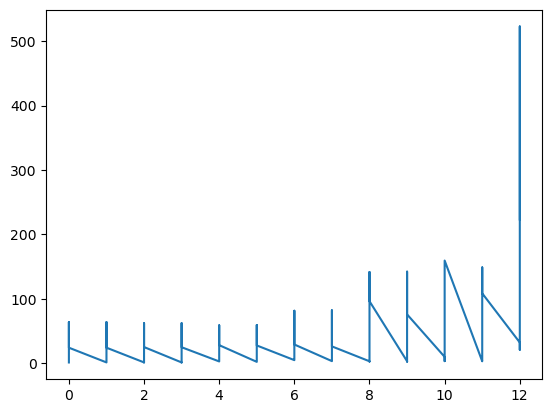

In [106]:
scores1 = pd.DataFrame(scores)
scores1.columns = ["d","i","avg RMSE"]
plt.plot(scores1.d , scores1["avg RMSE"])

In [108]:
scores1.sort_values("avg RMSE")

,d,i,avg RMSE
0,0,0.000000e+00,1.015561
1,0,1.388794e-11,1.015561
2,0,2.061154e-09,1.015561
3,0,8.315287e-07,1.015561
4,0,9.118820e-04,1.015827
...,...,...,...
88,9,1.096633e+03,142.048151
106,11,1.096633e+03,148.590685
98,10,2.008554e+01,159.290186
116,12,2.008554e+01,223.073630
